순환신경망
  - LSTM  Long Short-Term Memory 

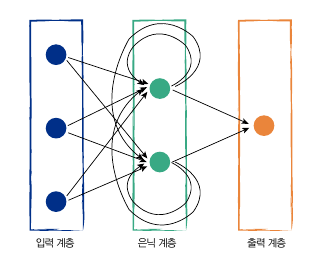

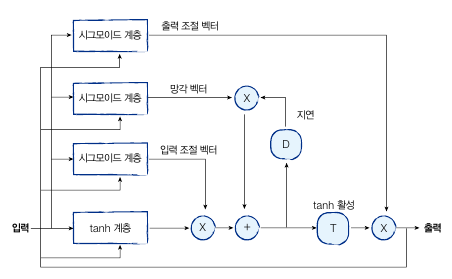



In [1]:
# 필요한 라이브러리
# keras.  -- 2.4.0 이전
# tensorflow.keras 2.4.0 이후
from tensorflow.keras.preprocessing import sequence
from keras.datasets import imdb
from keras import layers,models

In [2]:
# 데이터
class Data:
  def __init__(self, max_features=20000, maxlen = 80):
    (self.x_train,self.y_train),(self.x_test, self.y_test) =  imdb.load_data(num_words=max_features)
    self.x_train = sequence.pad_sequences(self.x_train, maxlen=maxlen)
    self.x_test = sequence.pad_sequences(self.x_test, maxlen=maxlen)

In [3]:
# 모델링
class RNN_LSTM(models.Model):
  def __init__(self,max_features, maxlen):
    x = layers.Input((maxlen,))
    h = layers.Embedding(max_features, 128)(x)   # 80 x 128
    h = layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2)(h) # 일반 드랍아웃과 순환 드랍아웃을 20%
    y = layers.Dense(1,activation='sigmoid')(h)
    super().__init__(x,y)
    self.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# 학습 및 평가
class Machine:
  def __init__(self, max_features=20000,maxlen=80):
    self.data = Data(max_features,maxlen)
    self.model = RNN_LSTM(max_features,maxlen)
  def run(self, epochs=3, batch_size=32):
    data = self.data
    model = self.model
    print('Training stage')
    print('=' * 30)
    model.fit(data.x_train,data.y_train,batch_size=batch_size, 
              epochs=epochs,validation_data=(data.x_test, data.y_test))
    loss,acc =  model.evaluate(data.x_test, data.y_test,batch_size=batch_size)
    print(f'loss:{loss} / acc:{acc}')


In [5]:
m = Machine()
m.run()

17464789/17464789 [==============================] - 0s 0us/step


Training stage
Epoch 1/3
782/782 [==============================] - 339s 424ms/step - loss: 0.4430 - accuracy: 0.7890 - val_loss: 0.3672 - val_accuracy: 0.8346
Epoch 2/3
782/782 [==============================] - 304s 389ms/step - loss: 0.2612 - accuracy: 0.8947 - val_loss: 0.3947 - val_accuracy: 0.8357
Epoch 3/3
782/782 [==============================] - 20s 25ms/step - loss: 0.5331 - accuracy: 0.8288
loss:0.5330900549888611 / acc:0.828760027885437


In [6]:
# m.save_weights('/content/drive/MyDrive/keras_rnn.h5')
m.model.save_weights('/content/drive/MyDrive/keras_rnn.h5')